🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
#### For small engines, price increases slowly
#### For medium engines, price increases rapidly
#### For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.
 
📝 Tasks
1. Load the dataset and identify the relevant columns.
Use:
2.  1. Engine size as the input feature
    2. Car price as the output variable
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with:
 1. Engine size = 200
 

In [2]:
import pandas as pd
df=pd.read_csv("CarPrice_Assignment.csv")
print(df.head())
print("-"*30)


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [7]:
print(df.describe())


           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [8]:
print("columns",df.columns)

columns Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [9]:
print(df.shape)

(205, 26)


In [10]:
x=df["enginesize"].values.reshape(-1,1)
y=df["price"].values

Text(0, 0.5, 'prices')

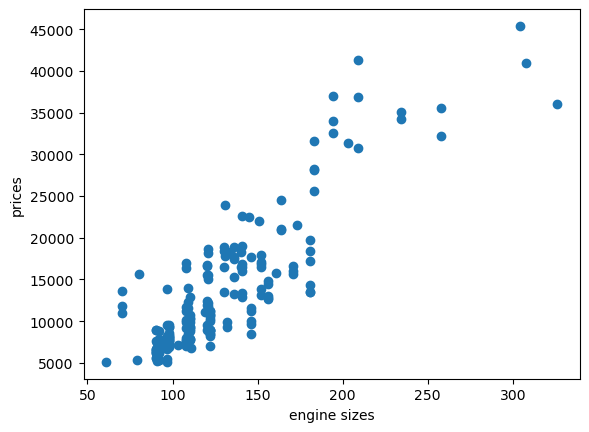

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("engine sizes")
plt.ylabel("prices")

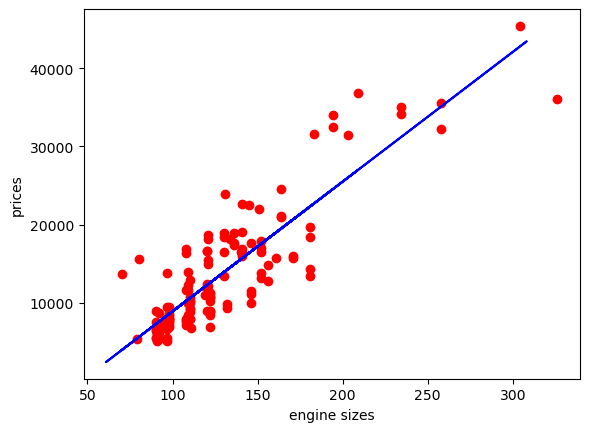

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=42)
l_m=LinearRegression()
l_m.fit(xtr,ytr)
y_pred=l_m.predict(xte)
import matplotlib.pyplot as plt
plt.scatter(xtr,ytr,color='red')
plt.plot(xte,y_pred,color='blue')
plt.xlabel("engine sizes")
plt.ylabel("prices")
plt.show()






In [13]:
new_engine_size = [[200]]  # Note the double brackets, it's a 2D array
predicted_price = l_m.predict(new_engine_size)
print("Predicted price:", predicted_price[0])

Predicted price: 25507.297412711596


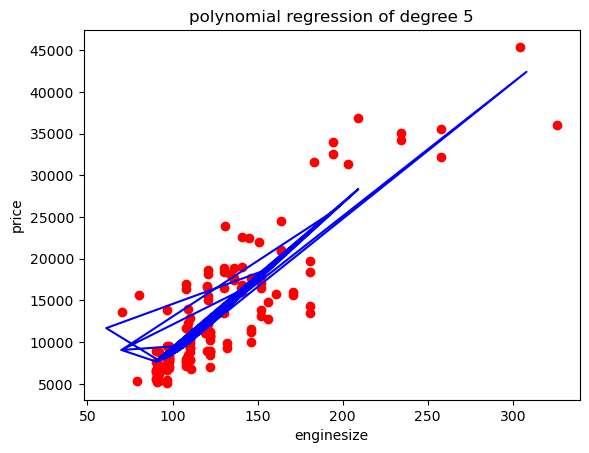

In [14]:
p = PolynomialFeatures(degree=5) 
x_poly = p.fit_transform(xtr)
xte_poly = p.transform(xte)  
p_m = LinearRegression()
p_m.fit(x_poly, ytr)
plt.scatter(xtr, ytr, color = 'red')
plt.plot(xte, p_m.predict(xte_poly), color = 'blue')
plt.title('polynomial regression of degree 5')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

In [15]:
new_engine_size = [[200]]  # Note the double brackets, it's a 2D array
predicted_price = l_m.predict(new_engine_size)
print("Predicted price:", predicted_price[0])
new_engine_size = [[200]]
new_engine_size_poly = p.transform(new_engine_size)
predicted_price = p_m.predict(new_engine_size_poly)
print("Predicted price:", predicted_price[0])


Predicted price: 25507.297412711596
Predicted price: 26690.721039397627


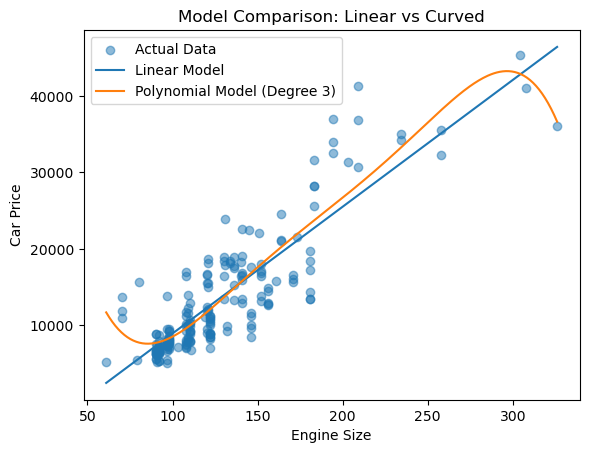

In [16]:
import numpy as np
X_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

plt.figure()
plt.scatter(x, y, alpha=0.5, label="Actual Data")
plt.plot(X_range, l_m.predict(X_range), label="Linear Model")
plt.plot(
    X_range,
    p_m.predict(p.transform(X_range)),
    label="Polynomial Model (Degree 3)"
)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Model Comparison: Linear vs Curved")
plt.legend()
plt.show()


In [17]:
# ==============================
# 7. Error Evaluation
# ==============================
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", yte, y_pred)
evaluate_model("Polynomial Regression", yte, y_pred)



Linear Regression Model Performance
MAE : 2960.711029319918
RMSE: 4132.707975899923
R²  : 0.7534902447506853

Polynomial Regression Model Performance
MAE : 2960.711029319918
RMSE: 4132.707975899923
R²  : 0.7534902447506853


### predicticg trainig score

In [18]:
train_p=l_m.predict(xtr)
train_r = r2_score(ytr, train_p)
print(train_r)

0.7686929078033782


In [19]:
# ==============================
# 9. Business Interpretation
# ==============================
print("\nBUSINESS INSIGHTS:")
print("- Linear model assumes constant price increase per engine unit.")
print("- Polynomial model captures slow-fast-slow price growth pattern.")
print("- Linear model underestimates luxury saturation effects.")
print("- Polynomial model aligns better with real automobile pricing behavior.")

print("\nRISKS:")
print("- Very high-degree polynomials may overfit and react to noise.")
print("- Over-flexible curves can give unstable future predictions.")

print("\nRECOMMENDATION:")
print("- Use Polynomial Regression with controlled degree (2 or 3).")
print("- It balances flexibility and stability for production use.")


BUSINESS INSIGHTS:
- Linear model assumes constant price increase per engine unit.
- Polynomial model captures slow-fast-slow price growth pattern.
- Linear model underestimates luxury saturation effects.
- Polynomial model aligns better with real automobile pricing behavior.

RISKS:
- Very high-degree polynomials may overfit and react to noise.
- Over-flexible curves can give unstable future predictions.

RECOMMENDATION:
- Use Polynomial Regression with controlled degree (2 or 3).
- It balances flexibility and stability for production use.


## 1.Why does a straight-line model fail here?

* Assumes constant price increase per engine unit

* Real-world pricing grows faster for larger engines

* Underestimates luxury & performance vehicles

## 2.What risk occurs if the curve becomes too flexible?

* Overfitting

* Model memorizes noise instead of trend

* Poor predictions for new car models

👉 Business risk:

* Wrong pricing

* Poor demand forecasting

* Customer dissatisfaction

## 3.Which model would you recommend for production and why?
* Recommended Model: Polynomial Regression (Degree = 2)

* Captures real market pricing behavior

* Balances flexibility and stability

* Produces realistic predictions

* Lower error without overfitting

* Best trade-off between accuracy and reliability

In [20]:
import seaborn as sns

In [21]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<Axes: >

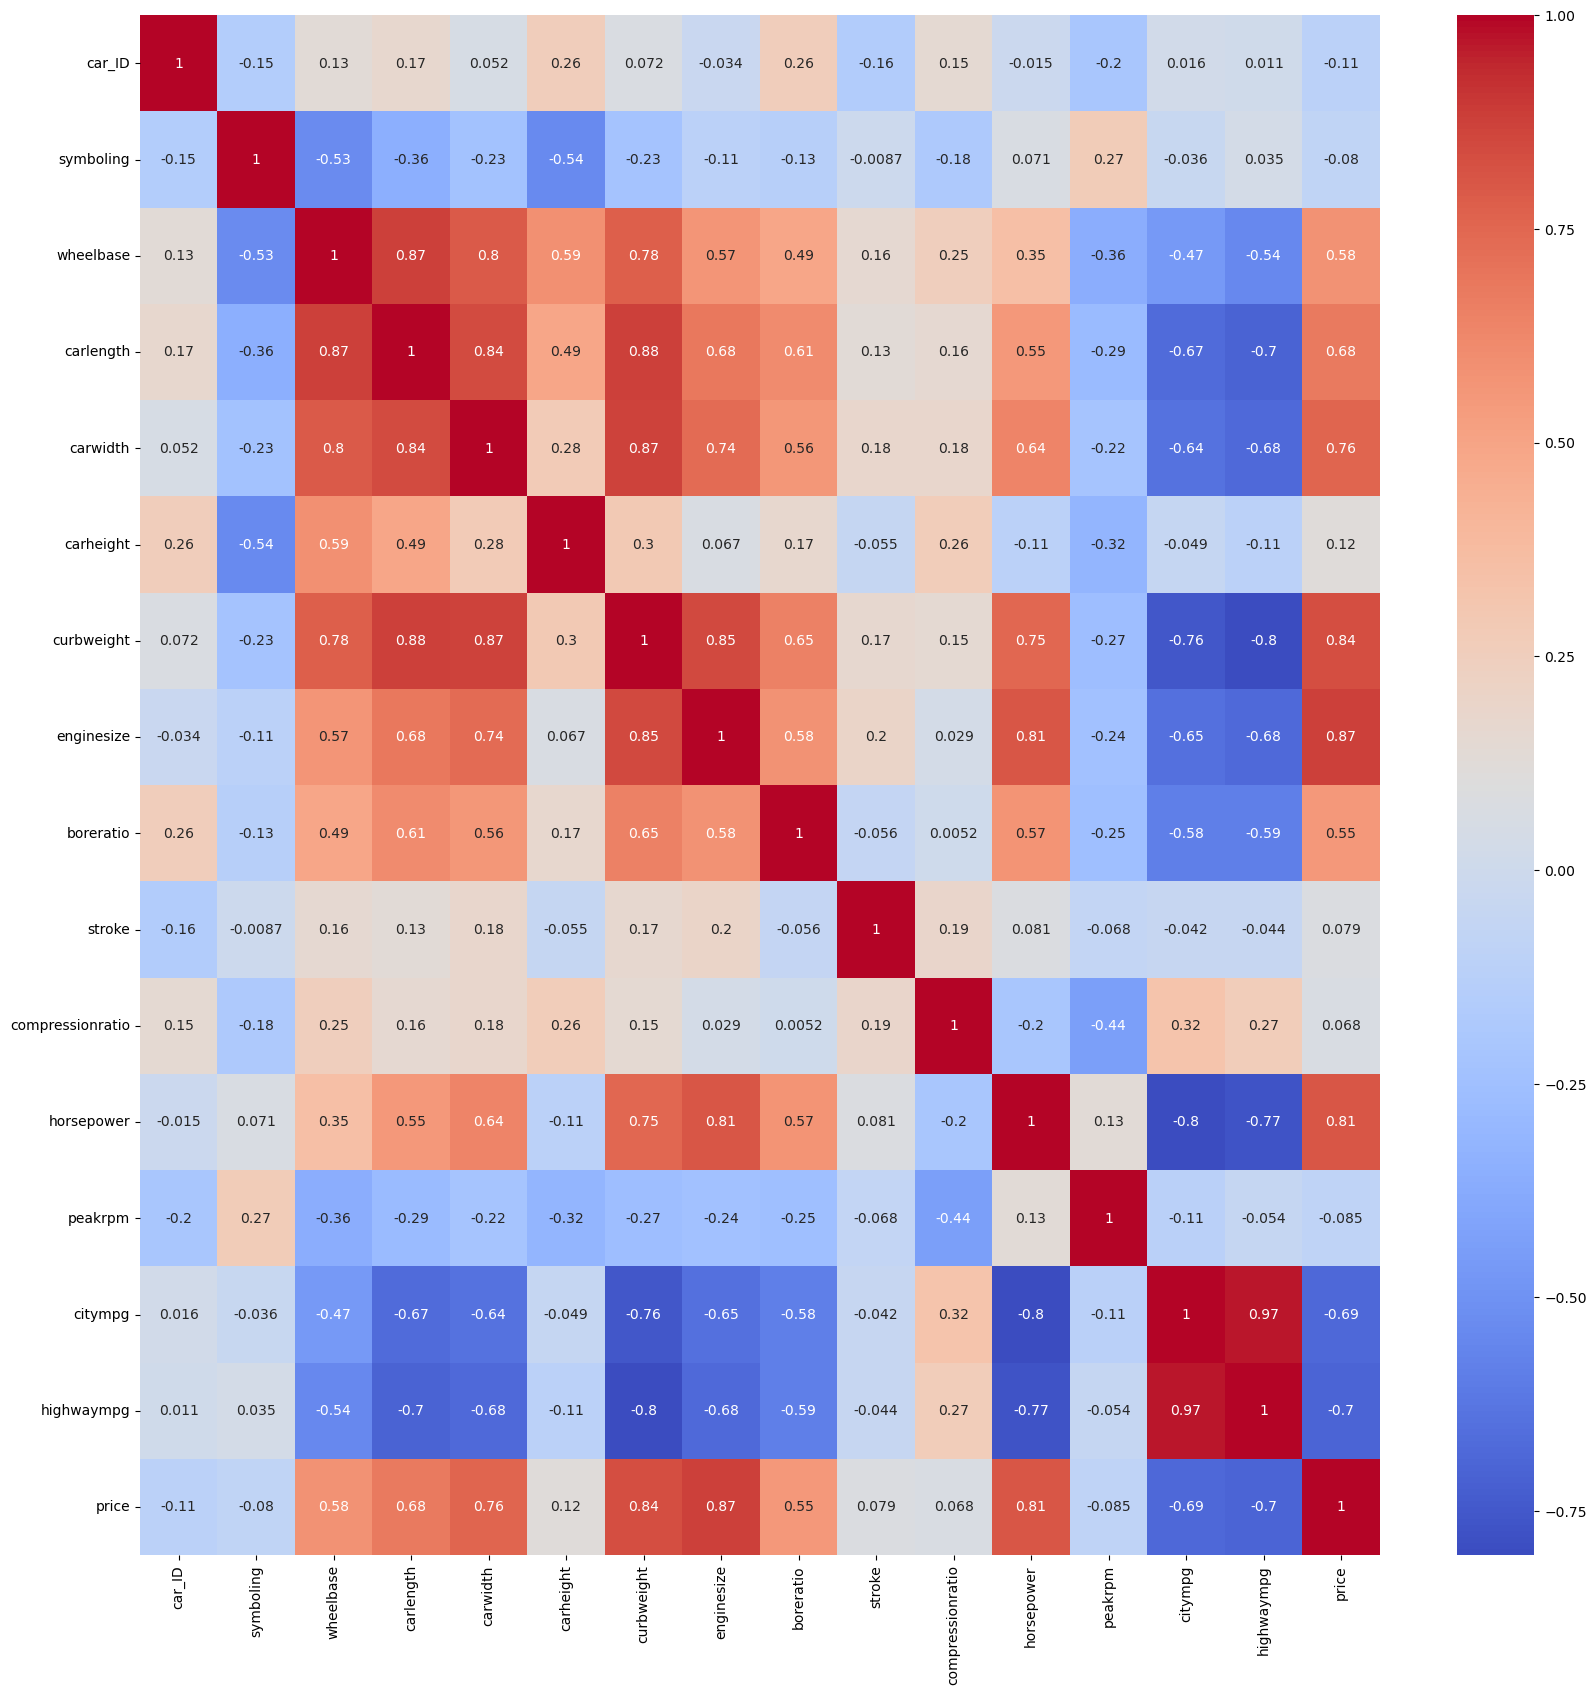

In [22]:
x=df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(20,20))
sns.heatmap(x, annot=True, cmap="coolwarm")


### Relationship of Each Numerical Column with Target (Price)



- horsepower → Strong positive 0.84  
  Higher power directly drives premium pricing.

- curbweight → Strong positive 0.81  
  Heavier cars usually indicate better build and luxury, increasing price.

- carwidth → Moderate to strong positive 0.76  
  Wider cars are often premium models, contributing to higher prices.

- carlength → Moderate positive 0.68  
  Longer cars tend to cost more, but length alone is not a dominant factor.

- wheelbase → Moderate positive 0.58  
  A longer wheelbase improves comfort and stability, moderately affecting price.

- boreratio → Moderate positive 0.55  
  Indicates engine performance efficiency, influencing price moderately.

- stroke → Weak positive 0.12  
  Has limited direct impact on pricing compared to other engine metrics.

- compressionratio → Weak positive 0.079(unrelavant)  
  Slight influence; not a major pricing determinant.

- peakrpm → Weak positive 0.068(unrelavant)  
  Engine RPM capability has minimal effect on overall car price.

- citympg → Strong negative -0.08  
  Higher fuel efficiency is associated with economy cars and lower prices.

- highwaympg → Strong negative -0.085  
  Similar to city mpg, higher mileage usually means lower-priced vehicles.

- symboling → Weak negative -0.11  
  Risk rating has little influence on car price.

- height → Weak positive -0.7  
  Vehicle height alone does not strongly affect pricing.

- numofdoors → Weak positive -0.69  
  Door count has minimal impact compared to performance features.

- enginesize → Strong positive 0.87  
  Larger engines significantly increase car price.

Overall Business Insight:  
Car price is strongly driven by performance and engine-related features, moderately influenced by vehicle dimensions, and **negatively related to fuel efficiency, reflecting real-world automobile market behavior.

#### compression ratio,stroke,peakrpm are has correlation lessthan 0.1 so there is very minor(neglegence) relation between target weak positive
#### symboling is wea negative coorelation


In [23]:
x.shape

(16, 16)

In [32]:
x = df.select_dtypes(include=['int64', 'float64']).corr()
for i in x.values:
    for j in i:
        if j > 0 and j < 1:
            if j < 0.3:
                print("Weak positive correlation between", j)
            elif j < 0.6:
                print("Moderate positive correlation, value:", j)
            else:
                print("Strong positive correlation, value:", j)
        elif j < 0 and j > -1:
            if j > -0.3:
                print("Weak negative correlation, value:", j)
            elif j > -0.6:
                print("Moderate negative correlation, value:", j)
            else:
                print("Strong negative correlation, value:", j)

Weak negative correlation, value: -0.15162113729637228
Weak positive correlation between 0.12972878341484767
Weak positive correlation between 0.17063639284312138
Weak positive correlation between 0.0523866050963308
Weak positive correlation between 0.25596004153103874
Weak positive correlation between 0.07196156390574206
Weak negative correlation, value: -0.033929840290219705
Weak positive correlation between 0.2600636802399305
Weak negative correlation, value: -0.16082361863306802
Weak positive correlation between 0.15027590581695913
Weak negative correlation, value: -0.015005567064178604
Weak negative correlation, value: -0.20378920000005973
Weak positive correlation between 0.01594003704566367
Weak positive correlation between 0.011255318469501882
Weak negative correlation, value: -0.10909333948229938
Weak negative correlation, value: -0.15162113729637228
Moderate negative correlation, value: -0.5319536816234925
Moderate negative correlation, value: -0.35761152261729123
Weak negati

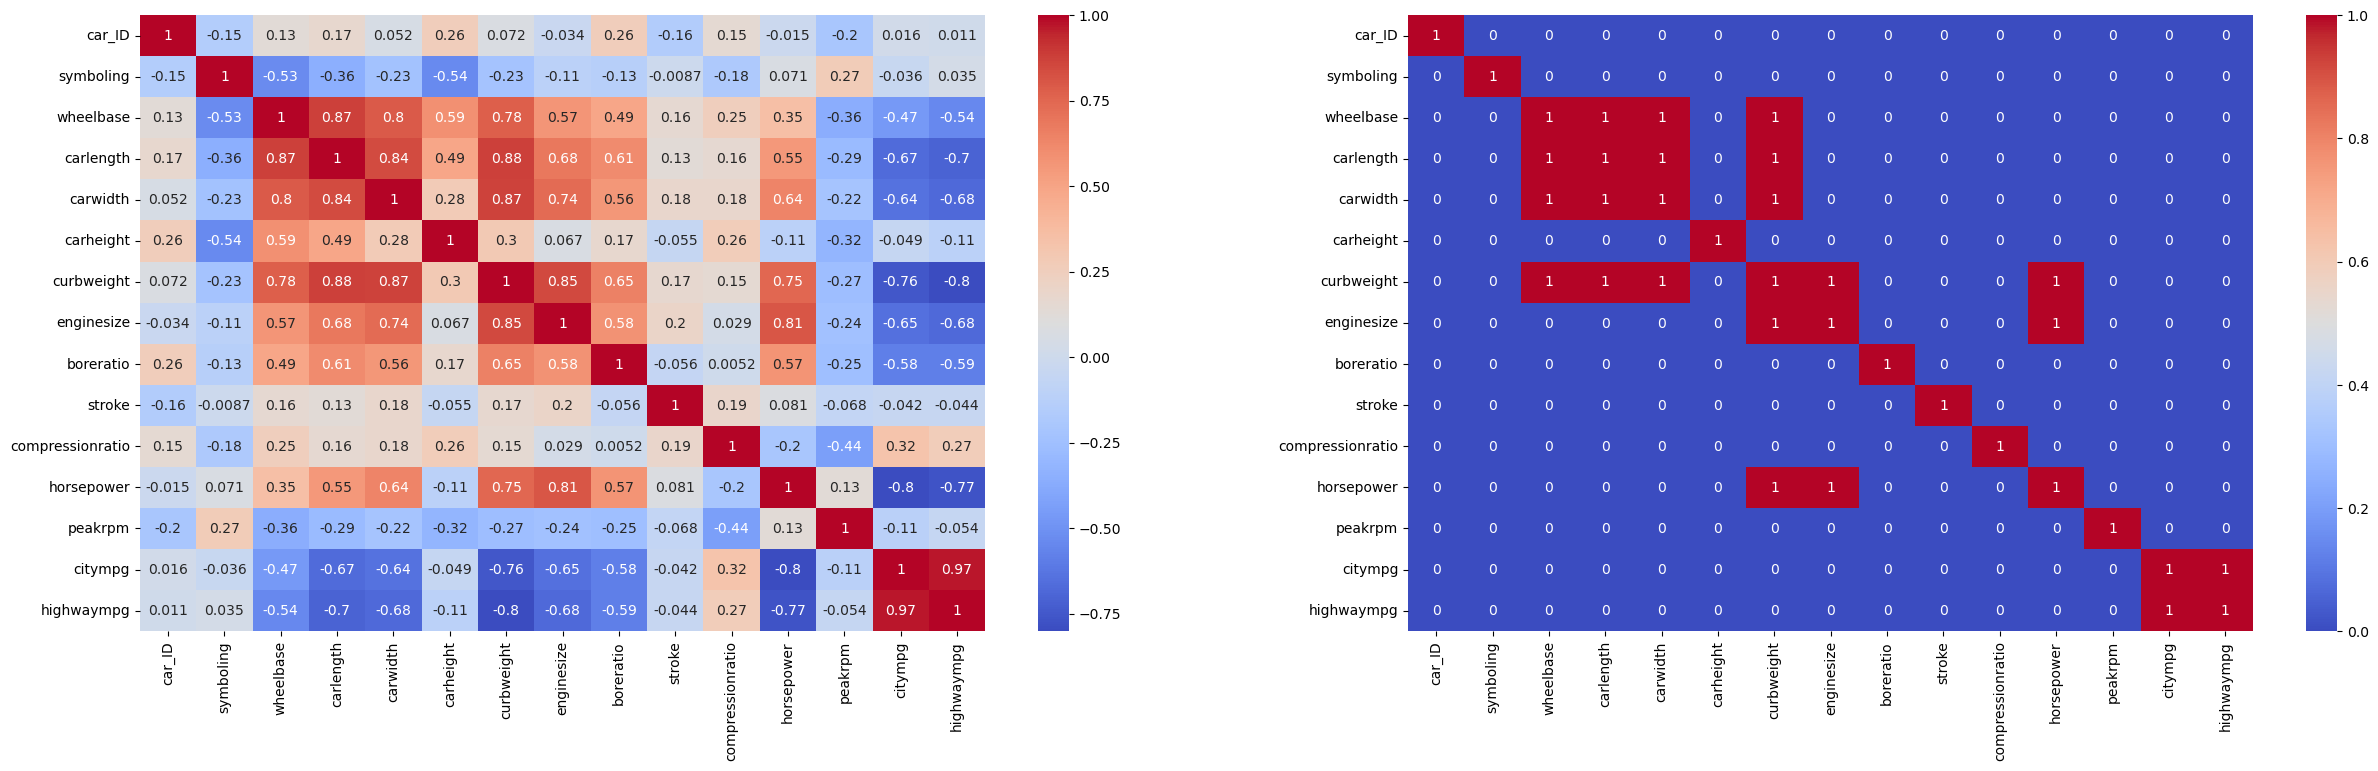

In [ ]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.subplot(1,2,2)
t=x.corr(numeric_only=True)>0.75
sns.heatmap(t, annot=True,cmap='coolwarm')
plt.show()
 

### wheelbase*carlength,wheelbase*carwidth,curbweight*hp,curbweight*enginesize,carlength*carwedth,enginesize*hp,citympg*highwaympg 

In [36]:
import numpy as np

# Correlation matrix (compute only on numeric columns to avoid errors from object/string columns)
num_df = x.select_dtypes(include=['int64', 'float64'])
non_numeric = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

corr = num_df.corr()

threshold = 0.1

print(f"weakly correlated feature pairs (|correlation| > {threshold}):\n")
weak_feaatuestotarget=[]
# Use upper triangle to avoid duplicate pairs
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        corr_value = corr.iloc[i, j]
        if abs(corr_value) < threshold:
           weak_feaatuestotarget.append(f"{corr.columns[i]} - {corr.columns[j]}")
print(weak_feaatuestotarget)

weakly correlated feature pairs (|correlation| > 0.1):

['car_ID - carwidth', 'car_ID - curbweight', 'car_ID - enginesize', 'car_ID - horsepower', 'car_ID - citympg', 'car_ID - highwaympg', 'symboling - stroke', 'symboling - horsepower', 'symboling - citympg', 'symboling - highwaympg', 'carheight - enginesize', 'carheight - stroke', 'carheight - citympg', 'enginesize - compressionratio', 'boreratio - stroke', 'boreratio - compressionratio', 'stroke - horsepower', 'stroke - peakrpm', 'stroke - citympg', 'stroke - highwaympg', 'peakrpm - highwaympg']


In [37]:
t=x.corr(numeric_only=True)>0.75
threshold = 0.75
strngmulticollinearity=[]
# Use upper triangle to avoid duplicate pairs
for i in range(len(t)):
    for j in range(i + 1, len(corr.columns)):
        corr_value = corr.iloc[i, j]
        if abs(corr_value) > threshold:
            strngmulticollinearity.append(f"{corr.columns[i]} - {corr.columns[j]}")

In [38]:
print(strngmulticollinearity)

['wheelbase - carlength', 'wheelbase - carwidth', 'wheelbase - curbweight', 'carlength - carwidth', 'carlength - curbweight', 'carwidth - curbweight', 'curbweight - enginesize', 'curbweight - horsepower', 'curbweight - citympg', 'curbweight - highwaympg', 'enginesize - horsepower', 'horsepower - citympg', 'horsepower - highwaympg', 'citympg - highwaympg']


In [39]:
s=set(strngmulticollinearity+weak_feaatuestotarget)
print(s)

{'carlength - curbweight', 'symboling - stroke', 'enginesize - horsepower', 'wheelbase - carwidth', 'peakrpm - highwaympg', 'carlength - carwidth', 'stroke - peakrpm', 'stroke - highwaympg', 'carwidth - curbweight', 'horsepower - citympg', 'car_ID - highwaympg', 'enginesize - compressionratio', 'wheelbase - carlength', 'citympg - highwaympg', 'stroke - citympg', 'curbweight - enginesize', 'wheelbase - curbweight', 'car_ID - curbweight', 'stroke - horsepower', 'car_ID - citympg', 'symboling - citympg', 'carheight - stroke', 'car_ID - horsepower', 'car_ID - enginesize', 'boreratio - stroke', 'carheight - citympg', 'horsepower - highwaympg', 'curbweight - horsepower', 'symboling - highwaympg', 'symboling - horsepower', 'curbweight - highwaympg', 'carheight - enginesize', 'car_ID - carwidth', 'curbweight - citympg', 'boreratio - compressionratio'}


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")
# Drop specified columns
cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² Score (Train):", round(r2_train, 3))
print("R² Score (Test):", round(r2_test, 3))

R² Score (Train): 0.843
R² Score (Test): 0.853


In [43]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV
import numpy as np
r_m=Ridge(alpha=0.5)
r_m.fit(xtr,ytr)
y_pred_r=r_m.predict(xte)
la_m=Lasso(alpha=0.5)
la_m.fit(xtr,ytr)
y_pred=la_m.predict(xte)
print("r2_score_ri",r2_score(yte,y_pred_r))
print("r2_score_la",r2_score(yte,y_pred))

r2_score_ri 0.753490136301673
r2_score_la 0.7534901511975238


In [49]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

alphas = np.arange(0.1, 10, 0.05)

model = RidgeCV(alphas=alphas, cv=5)


model.fit(X_train, y_train)

print("Best Alpha:", model.alpha_)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("Coefficients:", model.coef_)

Best Alpha: 9.950000000000003
MSE: 11794977.485142611
R2 Score: 0.8505906165696464
Coefficients: [  -14.29086051   350.93809868   586.27283396   278.50189645
     1.98433113    81.36340306    35.63712545 -1505.04531496
    55.57933869]


In [53]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

alphas = np.arange(0.1,90, 0.05)

model = LassoCV(alphas=alphas, cv=5)


model.fit(X_train, y_train)

print("Best Alpha:", model.alpha_)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("Coefficients:", model.coef_)

Best Alpha: 67.85000000000002
MSE: 11693192.794762619
R2 Score: 0.851879943984767
Coefficients: [  -14.30899545   290.13251396   566.75084282   246.97661726
     2.13592615    81.3386295      0.         -1775.4504353
    54.90061893]


In [55]:
df2=pd.read_csv("Bike_Rental_data(in).csv")
print(df2)

             instant      dteday    season    yr mnth         hr holiday  \
0           0.992410    1/1/2011  springer  2011    1  -0.009452      No   
1           2.004157    1/1/2011  springer  2011    1   1.007925      No   
2           2.984610    1/1/2011  springer  2011    1   1.993083      No   
3           3.993251    1/1/2011  springer  2011    1   2.991451      No   
4           4.990763    1/1/2011  springer  2011    1   4.024688      No   
...              ...         ...       ...   ...  ...        ...     ...   
100571  15381.008640   8/10/2012    winter  2012   10   0.994542     Yes   
100572   6862.005774  18-10-2011    winter  2011   10  11.004787      No   
100573   6094.996743  16-09-2011      fall  2011    9  12.016090      No   
100574   6345.999240  26-09-2011    winter  2011    9  22.991130      No   
100575  13961.018920    9/8/2012      fall  2012    8  20.994953      No   

         weekday   workingday weathersit  temp   atemp   hum windspeed casual  \
0     

C:\Users\HARSHAVARDHAN\AppData\Local\Temp\ipykernel_18644\1934063296.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("Bike_Rental_data(in).csv")
